# FSDS Machine Learning Workshop 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
# import the df 

df = pd.read_csv('data.csv')

In [15]:
# .head() returns the first n (here 10) rows of the imported dataframe. 
# It is useful for quickly inspecting the df and what kind of data it contains.

df.head(10)

,loan_percent_income,loan_grade,person_income,person_home_ownership,loan_int_rate,loan_status
0,0.59,D,59000,RENT,16.02,1
1,0.10,B,9600,OWN,11.14,0
2,0.57,C,9600,MORTGAGE,12.87,1
3,0.53,C,65500,RENT,15.23,1
4,0.55,C,54400,RENT,14.27,1
5,0.25,A,9900,OWN,7.14,1
6,0.45,B,77100,RENT,12.42,1
7,0.44,B,78956,RENT,11.11,1
8,0.42,A,83000,RENT,8.90,1
9,0.16,D,10000,OWN,14.74,1


In [14]:
# .info() prints information about a df (shape) and its columns (type of column, count of non-null values) and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_percent_income    32581 non-null  float64
 1   loan_grade             32581 non-null  object 
 2   person_income          32581 non-null  int64  
 3   person_home_ownership  32581 non-null  object 
 4   loan_int_rate          29465 non-null  float64
 5   loan_status            32581 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [19]:
# .describe() returns descriptive statistics for all the numeric columns in the df. 

df.describe()

,loan_percent_income,person_income,loan_int_rate,loan_status
count,32581.000000,3.258100e+04,29465.000000,32581.000000
mean,0.170203,6.607485e+04,11.011695,0.218164
std,0.106782,6.198312e+04,3.240459,0.413006
min,0.000000,4.000000e+03,5.420000,0.000000
25%,0.090000,3.850000e+04,7.900000,0.000000
50%,0.150000,5.500000e+04,10.990000,0.000000
75%,0.230000,7.920000e+04,13.470000,0.000000
max,0.830000,6.000000e+06,23.220000,1.000000


In [20]:
# include='object' parameter is used to show the decriptive statistic for object columns. 

df.describe(include='object')

,loan_grade,person_home_ownership
count,32581,32581
unique,7,4
top,A,RENT
freq,10777,16446


In [21]:
# counting empty values for each column 

df.isnull().sum()

loan_percent_income         0
loan_grade                  0
person_income               0
person_home_ownership       0
loan_int_rate            3116
loan_status                 0
dtype: int64

In [9]:
# .value_counts() returns containing counts of unique values.
# Resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default, 'dropna=False' includes the empty values. 

df['loan_grade'].value_counts(dropna=False)

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [22]:
df['person_home_ownership'].value_counts(dropna=False)

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

&nbsp;

`loan_grade` and `person_home_ownership` are object columns that need to be transformed into numeric values. 

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [30]:
df.replace(to_replace={'person_home_ownership': {'RENT': 0,
                                                 'MORTGAGE': 1,
                                                 'OWN': 2,
                                                 'OTHER': 3},
                      'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}}, inplace=True)

In [31]:
df['loan_grade'].value_counts(dropna=False)

0    10777
1    10451
2     6458
3     3626
4      964
5      241
6       64
Name: loan_grade, dtype: int64

In [32]:
df['person_home_ownership'].value_counts(dropna=False)

0    16446
1    13444
2     2584
3      107
Name: person_home_ownership, dtype: int64

In [37]:
# target variable
df['loan_status'].value_counts(dropna=False)

0    25473
1     7108
Name: loan_status, dtype: int64

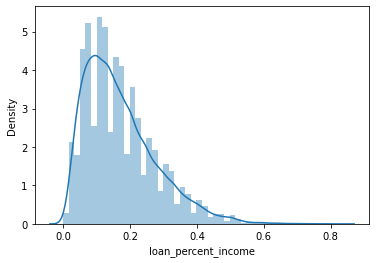

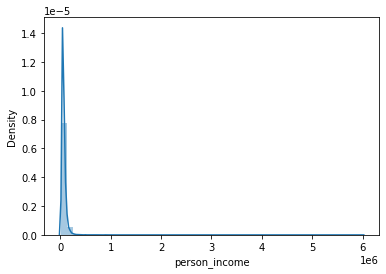

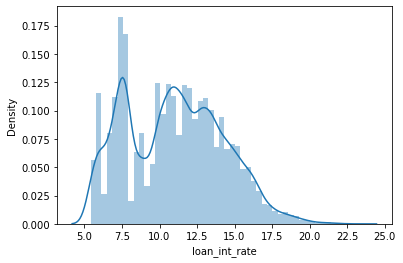

In [39]:
# sns.distplot() visualizes the distribution of data.

list_columns = ['loan_percent_income', 'person_income', 'loan_int_rate']

for i in list_columns:
    plt.figure()              
    sns.distplot(df[i].dropna()) 